# Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

    Number of Instances:
    442

    Number of Attributes:
    First 10 columns are numeric predictive values

    Target:
    Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
    age age in years

    sex

    bmi body mass index

    bp average blood pressure

    s1 tc, total serum cholesterol

    s2 ldl, low-density lipoproteins

    s3 hdl, high-density lipoproteins

    s4 tch, total cholesterol / HDL

    s5 ltg, possibly log of serum triglycerides level

    s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)



## 1. Loading the Data
* Use `sklearn.datasets` function **`load_diabetes`** 
* We added `%matplotlib inline` to enable Matplotlib in this notebook.

In [40]:
%matplotlib inline
from sklearn.datasets import load_diabetes


diabetes = load_diabetes() 

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## 2. Displaying the dataset's description

In [41]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

* Confirm number of **samples/features**, number of **targets**, **feature names**
    * samples are the rows in the dataset
    * features are columns in the dataset
    * Target is what you want to predict
    * feature neame are name of each columns

In [42]:
diabetes.data.shape

(442, 10)

The following code give the rows of the dataset

In [43]:
diabetes.target.shape

(442,)

The following code give the column and its names

In [44]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 3. Exploring the Data with a Pandas

In [45]:
import pandas as pd


pd.set_option('display.max_columns', None)  # to display all columns in the dataframe
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['ProgressAfter1year'] = diabetes.target

Looking at the first few rows of the dataset

In [46]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ProgressAfter1year
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Looking at the data type for each column


In [47]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 442 non-null    float64
 1   sex                 442 non-null    float64
 2   bmi                 442 non-null    float64
 3   bp                  442 non-null    float64
 4   s1                  442 non-null    float64
 5   s2                  442 non-null    float64
 6   s3                  442 non-null    float64
 7   s4                  442 non-null    float64
 8   s5                  442 non-null    float64
 9   s6                  442 non-null    float64
 10  ProgressAfter1year  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Calculate DataFrame's summary statistics

In [48]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ProgressAfter1year
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## 4. Visulation Features 
* Helpful to **visualize** data by **plotting the target value** against **each** feature
    Shows how **ProgressAfter1year** relates to **each feature**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# sample 10% of the data for visualization
# sampled_df = diabetes_df.sample(frac=0.1, random_state=42)
# since my dataset is small, I will use the entire dataset
sample_df = diabetes_df


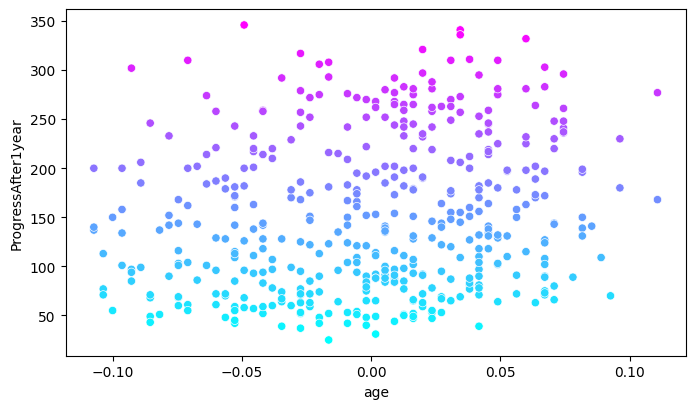

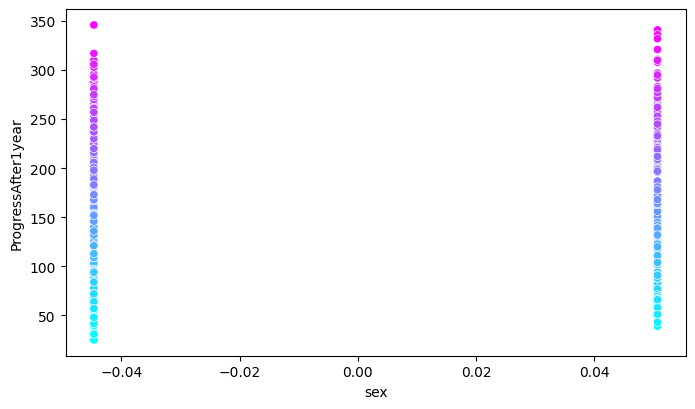

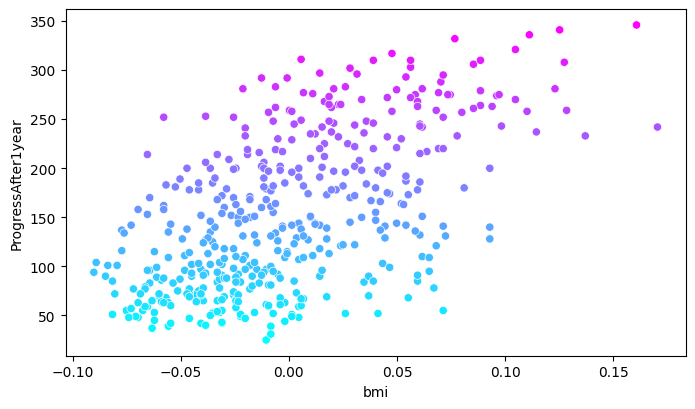

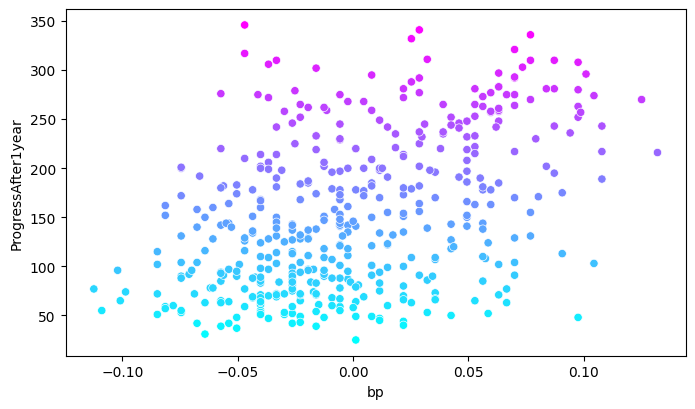

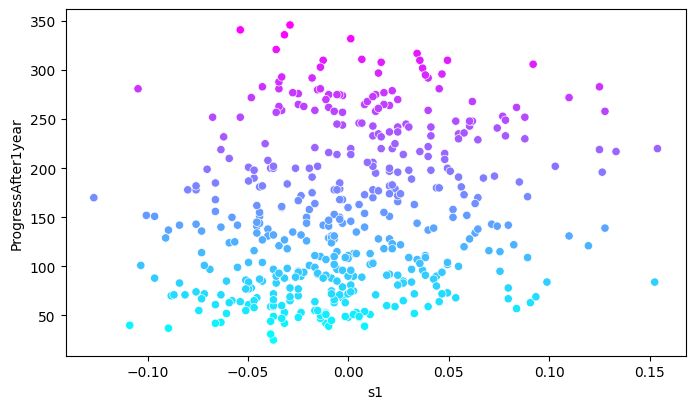

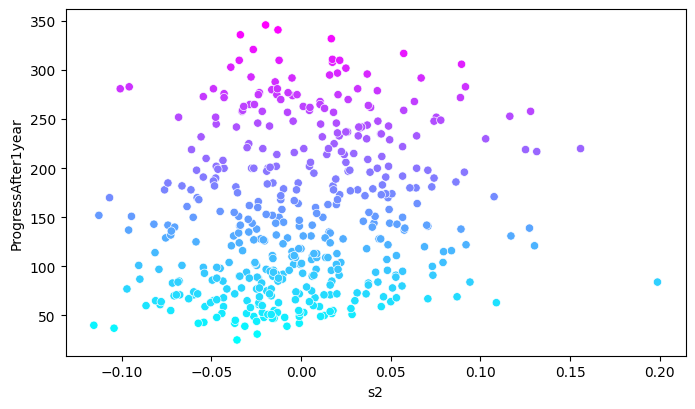

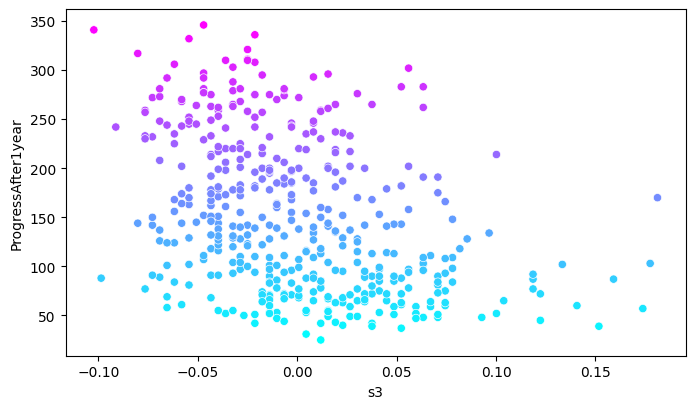

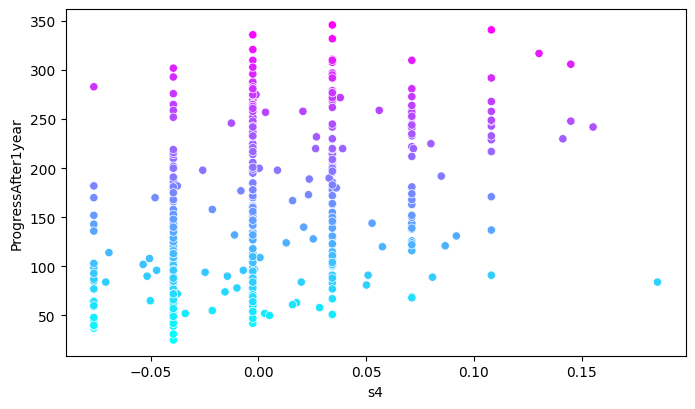

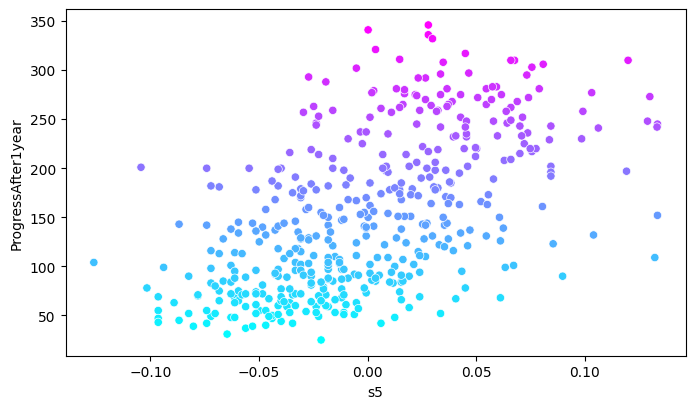

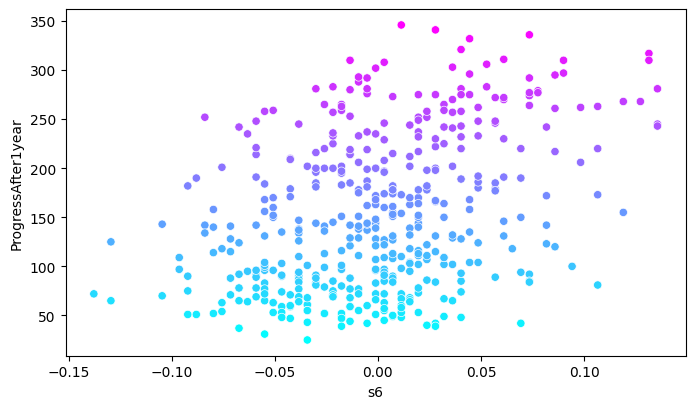

In [50]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data= sample_df, x=feature, 
                    y='ProgressAfter1year', hue='ProgressAfter1year', 
                    palette='cool', legend=False)

## 5. splitting the Data for Training and Testing Using `train_test_split`  

In [51]:
from sklearn.model_selection import train_test_split

# Prepare the data for training and testing
# X contains all features except the target variable
# y contains the target variable 'ProgressAfter1year'
# axis - 1 means we are dropping a column
# axis=0 would mean dropping a row
X = diabetes_df.drop('ProgressAfter1year', axis=1)
y = diabetes_df['ProgressAfter1year']

# 20% for testing, 80% for training
# ramdom_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")



Training set size: (353, 10)


In [52]:
print(f"Testing set size: {X_test.shape}")


Testing set size: (89, 10)


In [53]:
print("y_train shape:", y_train.shape)

y_train shape: (353,)


In [54]:
print("y_test shape:", y_test.shape)

y_test shape: (89,)


## 6.Training the Model
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [55]:
from sklearn.linear_model import LinearRegression

linear_Regression = LinearRegression()

linear_Regression.fit(X = X_train, y = y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6.Training the Model (cont.)
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`) 
    * **Positive coefficients** &mdash; as the ProgressAfter1year**increases** as feature value **increases** 
    * **Negative coefficients** &mdash; as the ProgressAfter1year **decreases** as feature value **increases**

In [56]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_Regression.coef_[i]}')  

       age: 37.90402135007452
       sex: -241.9643623127402
       bmi: 542.4287585162903
        bp: 347.7038439138558
        s1: -931.4888458835153
        s2: 518.0622769833369
        s3: 163.41998299131072
        s4: 275.31790157864845
        s5: 736.1988589046842
        s6: 48.67065743196525


- coef_ → tells you the effect of each feature on the target.

- intercept_ → baseline value.

- Features close to zero → don’t influence target much.

- Sign of coefficient → positive = target increases, negative = target decreases.

In [58]:
# Combine feature names with coefficients
coef_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': linear_Regression.coef_
})

print(coef_df)
print("Intercept:", linear_Regression.intercept_)


  Feature  Coefficient
0     age    37.904021
1     sex  -241.964362
2     bmi   542.428759
3      bp   347.703844
4      s1  -931.488846
5      s2   518.062277
6      s3   163.419983
7      s4   275.317902
8      s5   736.198859
9      s6    48.670657
Intercept: 151.34560453985995


## 6.Training the Model (cont.)

* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)

## 7. Testing the Model
- use the estimator's 'predict' method

In [ ]:
Predicted = linear_Regression.predict(X_test)
# predicated is the predicted values for y_test or ProgressAfter1year

In [60]:
expected = y_test

In [ ]:
Predicted [ :5]  # display first 5 predictions
print("Predicted:", Predicted[:5])

array([219.,  70., 202., 230., 111.])

In [ ]:
expected[:5].values  # display first 5 actual values
print("Expected:", expected[:5])
# left rows are rows indexes from the original dataset

Expected: 287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: ProgressAfter1year, dtype: float64


## 7. Testing the Model (cont.)
* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

## 8.Visualizing the Expected vs. Predicted value
* Create a `DataFrame` containing columns for the expected and predicted values:

In [74]:
df = pd.DataFrame()

In [75]:
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(Predicted)


* Plot the data as a scatter plot with the **expected (target) ** along the x-axis and the **predicted ** along the **y**-axis: 
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line). 
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`). 
    * The third argument (`'k--'`) indicates the line’s style. 
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line: 
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line. 
* Appears that as the expected median house value increases, more of the predicted values fall below the line. 
* So the model **seems to predict** lower median house values as the **expected** median house value increases. 

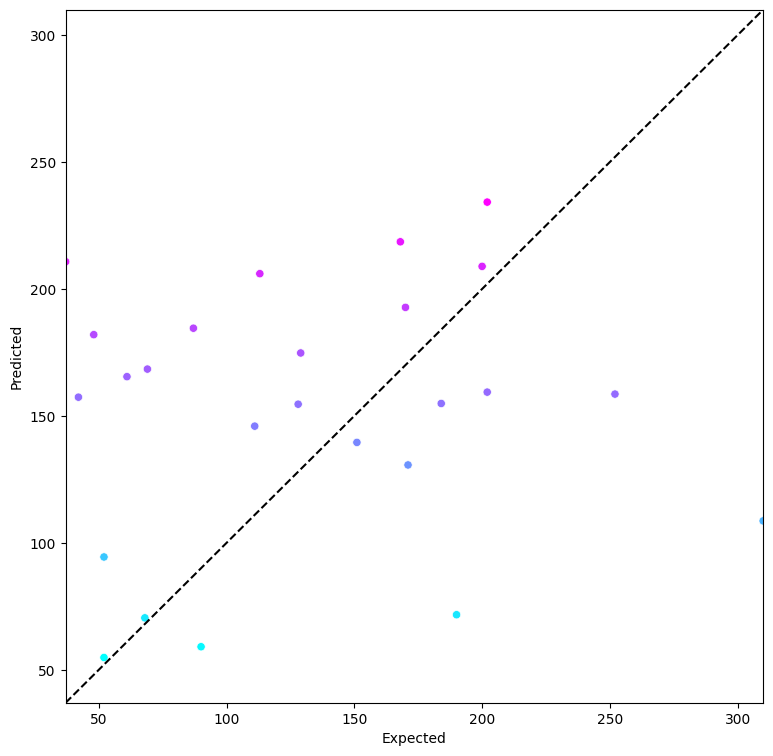

In [76]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), Predicted.min())

end = max(expected.max(), Predicted.max())  

axes. set_xlim(start, end)
axes. set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')  # dashed diagonal

## 9. Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values 
* Calculate with arrays representing the **expected** and **predicted results**

In [77]:
from sklearn import metrics

In [79]:
metrics.r2_score(expected, Predicted)  # R^2 score

0.4526027629719197

## 10. Choosing the Best Model


In [80]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
     'LinearRegression': linear_Regression,
     'ElasticNet': ElasticNet(),
     'Lasso': Lasso(),
     'Ridge': Ridge()
        }

In [82]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=diabetes.data, y=diabetes.target, cv=kfold,
    scoring='r2')
    print(f'{estimator_name:>16}: ' +
    f'mean of r2 scores={scores.mean():.3f}')



LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
